In [2]:
import shap
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Defining the features and the target variables

In [3]:
x1 = np.random.normal(0, 1, 100)

In [4]:
#defiming epsilone
e = np.random.normal(0, 0.001, 100)

In [5]:
#Calculating the target variables.
y=np.sin(x1)+e

In [6]:
x2=np.random.normal(0, 1, 100)
x3=np.random.normal(0, 1, 100)

In [7]:
dict={'X1':x1, 'X2':x2, 'X3':x3, 'Y':y}
df=pd.DataFrame(dict)

In [8]:
df

,X1,X2,X3,Y
0,1.427283,0.159649,0.222038,0.992828
1,1.478701,-0.010198,-0.608259,0.993729
2,-0.239772,-1.515310,0.360445,-0.240123
3,-0.247494,-0.048922,-1.048131,-0.244500
4,1.533281,0.124226,-2.492623,1.000222
...,...,...,...,...
95,-0.219324,0.912585,-0.817331,-0.217306
96,-0.076612,0.634166,0.091480,-0.077031
97,0.307199,-0.727828,-0.706316,0.302377
98,0.643086,-0.652758,-0.248805,0.599800


In [9]:
X= df[['X1', 'X2', 'X3']]

In [10]:
Y=df['Y']

##### Modelling using Decision Tree Regressor

In [11]:
#Splitting the dataset into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [14]:
#model.score(X_test, y_test)

In [15]:
#model.score(X_train, y_train)

##### Calculating the SHAP Values for explaining the model predictions

In [16]:
explainer = shap.Explainer(model.predict,X)
shap_values = explainer(X)

In [17]:
shap_values #Contains all the SHAP Values, Base Vlaues and the whole data set that has been passed to the Explainer.

.values =
array([[ 1.00266494e+00, -5.60006360e-03,  2.64755110e-02],
       [ 1.00605277e+00, -2.75760605e-03,  2.76393441e-02],
       [-2.19487723e-01,  7.20830194e-03,  2.86911227e-03],
       [-2.08556028e-01, -8.28781528e-03,  3.05614880e-03],
       [ 1.00558020e+00, -2.28503478e-03,  2.76393441e-02],
       [-5.34972117e-01, -3.71644421e-02, -2.63691126e-03],
       [-6.49809756e-02, -2.99152521e-04, -3.49620410e-03],
       [-3.16387666e-01,  4.12912819e-03,  8.29565963e-03],
       [ 8.90776850e-01, -1.18814718e-02, -4.65363449e-02],
       [-8.82847677e-01, -1.16941177e-02, -3.59058825e-03],
       [-3.61150969e-01, -5.78436347e-04,  2.88438401e-03],
       [-1.49260806e-01, -3.22872756e-03,  3.01917821e-03],
       [ 3.93143345e-01, -3.47166095e-03, -2.67720215e-03],
       [-9.37697368e-04,  9.64325410e-03, -2.70858889e-03],
       [-7.29627063e-02, -3.34485812e-03,  3.05614880e-03],
       [-5.51597500e-01, -2.62321184e-02,  3.05614880e-03],
       [ 1.75345969e-01, -3.60

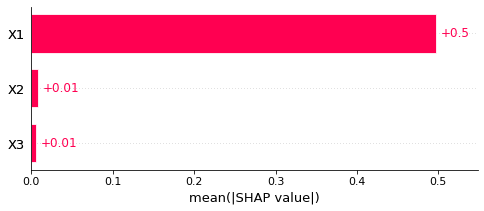

In [18]:
shap.plots.bar(shap_values)

###### As per the above Bar Chart, it is evedint that X1 feature is most influential variable and it is contribution on average +/- 0.50 to each of the predictions.

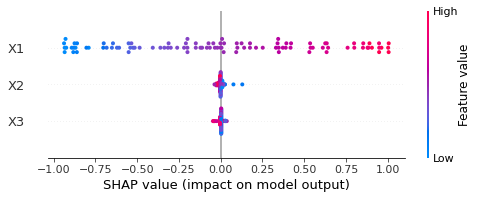

In [19]:
shap.plots.beeswarm(shap_values)

###### As per the above Beeswarm Plot, it can be seen that X1 has a wide distribution of SHAP values and also for high vales of X1, it has high SHAP values which indicates that high value of X1 is pushing the predictions to go close to 1 and inversely lower values of X1 are pushing the predicted values close to -1 . Furthermore, for X2 and X3 as they are still on the base value, it is clear that they have no contribution in the prediction.

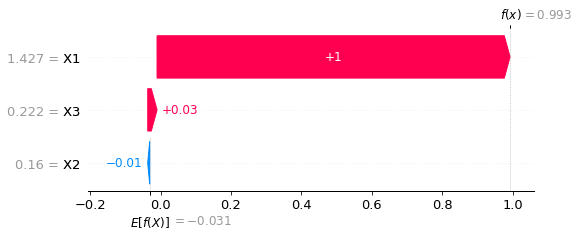

In [20]:
shap.plots.waterfall(shap_values[0])

##### With the Waterfall plot for the first observation we can see that influence of X1 is quite high as compaired to other variables in pushing the prediction from the base value to the predicted one.

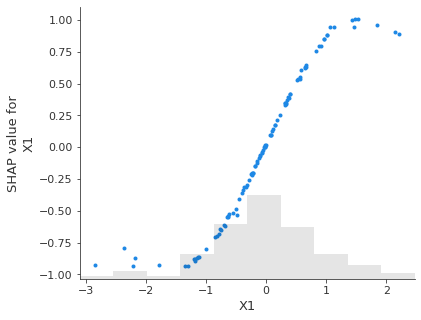

In [21]:
shap.plots.scatter(shap_values[:,"X1"])

##### The Dependance Plot of X1 vs SHAP Values clearly shows that X1 has the most influence in the prediction as its SHAP values follow the same trend as that of the target variable. 

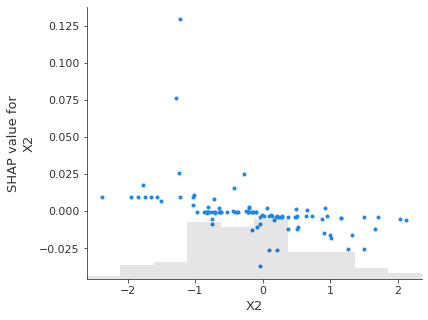

In [22]:
shap.plots.scatter(shap_values[:,"X2"])

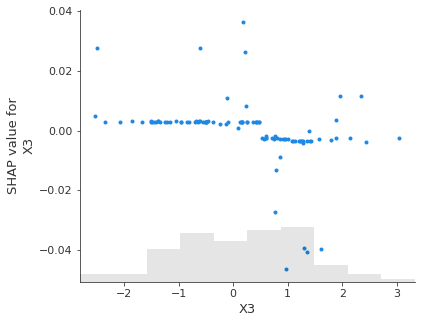

In [23]:
shap.plots.scatter(shap_values[:,"X3"])

##### Seeing the Dependance Plots of X2 and X3 it is evident that major distribution of points are near 0 so there contribution towards the predictions is mearly negligible.